## hybrid

In [2]:
import pandas as pd # a library for data manipuation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Desktop/concrete_Data.csv")

In [4]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
# first we need to separate dataset as input(X) and output(y)
X=df.iloc[:,:-1] #independant features
y=df.iloc[:,-1]  #dependant features

In [6]:
#importing training ang testing module
from sklearn.model_selection import train_test_split
# spliting the dataset for testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [9]:
print(f"coefficient of determination for train data: {regressor.score(X_train,y_train)}")

coefficient of determination for train data: 0.9837234127337238


In [10]:
print(f"coefficient of determinatio for test data:{regressor.score(X_test,y_test)}")

coefficient of determinatio for test data:0.8909683655178906


In [11]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score

array([ 0.66760097,  0.68356339,  0.73404651,  0.8399329 , -1.29187046])

In [12]:
score.mean()

0.3266546620370671

In [13]:
prediction=regressor.predict(X_test)
prediction

array([30.2411    ,  7.6008    , 79.22      , 60.3295    , 11.445     ,
       47.67510476, 60.75746667, 24.4525    , 73.3415    , 51.449     ,
       18.1458    , 42.6042    , 35.7032    , 15.3317    , 51.5955    ,
       57.42614167, 37.7466    , 34.5552    , 50.85853333, 38.2643    ,
       58.33176667, 28.0657    , 29.7037    , 39.89137667, 18.08683333,
       28.0612    , 62.4707    , 25.3516    , 57.42614167, 63.1883    ,
       21.2551    , 45.0002    , 25.8388    , 37.4982    , 20.429     ,
        9.1868    , 34.29912667, 28.4607    , 35.0323    , 28.4312    ,
       35.65343333, 35.5764    , 32.3938    , 34.6759    , 61.86111667,
       33.8691    , 26.66376667, 37.0105    , 33.6672    , 50.7378    ,
       43.5472    , 27.2913    , 21.8267    , 39.3912    , 52.0859    ,
       45.6896    , 38.1885    , 55.97450833, 63.9653    , 35.7113    ,
       36.4207    , 23.3745    , 59.9537531 , 46.40004762, 12.8327    ,
       60.9535    , 37.7698    , 26.1305    , 14.1698    , 14.84

In [14]:
new_input=[[198.6,132.4,0.0,192.0,0.0,978.4,825.5,360]]
new_output=regressor.predict(new_input)
new_output

array([43.3296])

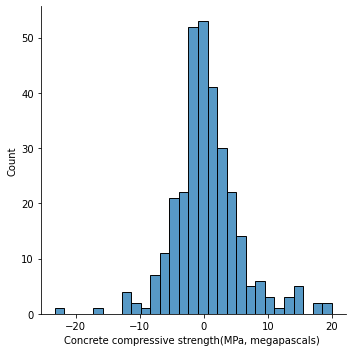

In [15]:
sns.displot(y_test-prediction)

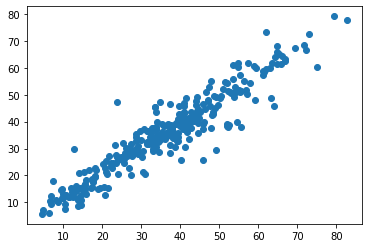

In [16]:
plt.scatter(y_test,prediction)

In [17]:
from sklearn import metrics

In [18]:
print('MAE:' ,metrics.mean_absolute_error(y_test,prediction))
print("MSE:" ,metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 3.6664737609801206
MSE: 27.988396533234344
RMSE: 5.290406083963153


## firefly algorithm

In [19]:
from FireflyAlgorithm import FireflyAlgorithm


In [25]:
%%time
def firefly(x):
    xx = 0
    print(int(x[0]),int(x[1]),int(x[2]),int(x[3]))
    model=RandomForestRegressor(n_estimators=int(x[0]),max_leaf_nodes=int(x[1]),max_depth=int(x[2]),min_samples_split=int(x[3]),verbose=False)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    xx = (int(np.sqrt(metrics.mean_squared_error(y_test,prediction))))
    print(xx)
    #print(model.best_params_)
    return xx
best = FireflyAlgorithm(function=firefly, dim=4,lb=np.array([10,2,2,2]),ub=np.array([100,50,20,10]), max_evals=5, pop_size=50,alpha=1.0,betamin=1.0,gamma=0.01)
print("best  = ",best)
    

    

62 43 8 3
5
18 34 18 8
6
20 20 3 2
8
35 48 19 7
5
42 29 12 2
6
55 37 15 8
6
77 2 18 6
12
19 16 16 6
6
73 17 14 5
6
26 39 8 4
6
61 29 11 5
6
49 45 15 7
5
71 4 9 6
10
84 19 8 2
6
87 10 11 2
8
61 25 12 3
6
58 47 12 7
5
29 13 16 9
7
39 41 11 3
6
36 30 14 7
6
21 23 7 4
6
17 15 19 4
7
57 40 5 8
6
74 39 4 2
7
12 36 17 9
6
34 12 15 4
7
13 33 11 9
6
74 36 6 7
5
40 29 11 4
6
74 43 11 8
6
74 20 6 3
6
61 18 17 7
6
10 3 8 8
11
82 15 17 8
7
51 39 16 8
5
65 15 18 4
7
82 22 2 2
10
84 35 6 7
6
55 17 5 9
7
15 22 4 5
7
60 16 10 8
7
24 46 17 7
5
54 5 4 9
9
98 46 14 3
5
21 21 12 6
6
87 15 14 3
7
90 8 16 6
8
40 33 9 5
6
15 42 7 7
5
16 25 6 8
6
best  =  5
Wall time: 17.2 s
